<a href="https://colab.research.google.com/github/vijaidjearam/NSEstockanalysis/blob/main/fbprophet_19022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Required

In [ ]:
!pip install nsepython
!pip install prophet

# Importing Libraries

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from nsepython import *
import pandas as pd


ModuleNotFoundError: No module named 'nsepython'

# Input Values for the simulation

In [ ]:
symbol = "NIFTY 50" # @param ["NIFTY 50"]
start_date = "2004-01-01" # @param {type:"date"}
end_date = "2024-02-19"# @param {type:"date"}


# Preparing data

In [ ]:
df = pd.DataFrame(index_history(symbol,start_date,end_date))
df.HistoricalDate = pd.to_datetime(df.HistoricalDate,format="%d %b %Y")
df

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,Nifty 50,2024-02-19,22103.45,22186.65,22021.05,22122.25
1,Nifty 50,Nifty 50,2024-02-16,22020.3,22068.65,21968.95,22040.70
2,Nifty 50,Nifty 50,2024-02-15,21906.55,21953.85,21794.8,21910.75
3,Nifty 50,Nifty 50,2024-02-14,21578.15,21870.85,21530.2,21840.05
4,Nifty 50,Nifty 50,2024-02-13,21664.3,21766.8,21543.35,21743.25
...,...,...,...,...,...,...,...
4995,Nifty 50,Nifty 50,2004-01-07,1927.95,1930.95,1888.1,1916.70
4996,Nifty 50,Nifty 50,2004-01-06,1955.1,1979.05,1908.75,1926.70
4997,Nifty 50,Nifty 50,2004-01-05,1946.3,1969.2,1930.75,1955.00
4998,Nifty 50,Nifty 50,2004-01-02,1912.25,1951.7,1911.05,1946.00


# Filtering only required data for the simulation

In [ ]:
data = df[["HistoricalDate","CLOSE"]]
data

,HistoricalDate,CLOSE
0,2024-02-19,22122.25
1,2024-02-16,22040.70
2,2024-02-15,21910.75
3,2024-02-14,21840.05
4,2024-02-13,21743.25
...,...,...
4995,2004-01-07,1916.70
4996,2004-01-06,1926.70
4997,2004-01-05,1955.00
4998,2004-01-02,1946.00


# Renaming the dataframe according to Prophet requirements

In [ ]:
data.columns = ["ds","y"]
data

,ds,y
0,2024-02-19,22122.25
1,2024-02-16,22040.70
2,2024-02-15,21910.75
3,2024-02-14,21840.05
4,2024-02-13,21743.25
...,...,...
4995,2004-01-07,1916.70
4996,2004-01-06,1926.70
4997,2004-01-05,1955.00
4998,2004-01-02,1946.00


# Making Prediction for the next 90 days

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)
future_dates = prophet.make_future_dataframe(periods=90)
prediction = prophet.predict(future_dates)
prediction

In [ ]:
plot_plotly(prophet,prediction)

# Back testing with know data

*   From the orignal data we are deleteing the last 90 days records , this data is given as the training data
*   The forecast is the result of the prediction with the traing data
*   As see below the actual dataset has 5000 rows, now the train dataframe has only 4910 rows



In [ ]:
test = data.iloc[:90]
train = data.iloc[90:]
train

,ds,y
90,2023-10-10,19689.85
91,2023-10-09,19512.35
92,2023-10-06,19653.50
93,2023-10-05,19545.75
94,2023-10-04,19436.10
...,...,...
4995,2004-01-07,1916.70
4996,2004-01-06,1926.70
4997,2004-01-05,1955.00
4998,2004-01-02,1946.00


In [ ]:
test

,ds,y
0,2024-02-19,22122.25
1,2024-02-16,22040.70
2,2024-02-15,21910.75
3,2024-02-14,21840.05
4,2024-02-13,21743.25
...,...,...
85,2023-10-17,19811.50
86,2023-10-16,19731.75
87,2023-10-13,19751.05
88,2023-10-12,19794.00


In [ ]:
prophet1 = Prophet(daily_seasonality=True)
prophet1.fit(train)
future_dates = prophet.make_future_dataframe(periods=10)
forecast = prophet1.predict(future_dates)
plot_plotly(prophet1,forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wn2wny6/fudq2u8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wn2wny6/p9mate63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3972', 'data', 'file=/tmp/tmp0wn2wny6/fudq2u8f.json', 'init=/tmp/tmp0wn2wny6/p9mate63.json', 'output', 'file=/tmp/tmp0wn2wny6/prophet_model3s4zj74b/prophet_model-20240221085357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,1837.994524,975.275568,2573.283776,1837.994524,1837.994524,-56.704814,-56.704814,-56.704814,-233.661028,...,-11.927419,-11.927419,-11.927419,188.883633,188.883633,188.883633,0.0,0.0,0.0,1781.289710
1,2004-01-02,1838.977516,903.985548,2621.127280,1838.977516,1838.977516,-62.695993,-62.695993,-62.695993,-233.661028,...,-24.716179,-24.716179,-24.716179,195.681215,195.681215,195.681215,0.0,0.0,0.0,1776.281523
2,2004-01-05,1841.926491,974.249584,2583.160139,1841.926491,1841.926491,-40.840463,-40.840463,-40.840463,-233.661028,...,-21.539447,-21.539447,-21.539447,214.360012,214.360012,214.360012,0.0,0.0,0.0,1801.086028
3,2004-01-06,1842.909482,979.312430,2658.434943,1842.909482,1842.909482,-30.466639,-30.466639,-30.466639,-233.661028,...,-16.374674,-16.374674,-16.374674,219.569063,219.569063,219.569063,0.0,0.0,0.0,1812.442844
4,2004-01-07,1843.892474,957.727276,2610.494733,1843.892474,1843.892474,-32.049992,-32.049992,-32.049992,-233.661028,...,-22.454880,-22.454880,-22.454880,224.065916,224.065916,224.065916,0.0,0.0,0.0,1811.842482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,2024-02-25,21197.275850,20132.748893,21881.043094,21063.705964,21290.998215,-163.309469,-163.309469,-163.309469,-233.661028,...,67.083627,67.083627,67.083627,3.267933,3.267933,3.267933,0.0,0.0,0.0,21033.966382
5006,2024-02-26,21203.648926,20107.605524,21729.047513,21068.142911,21299.119936,-262.305045,-262.305045,-262.305045,-233.661028,...,-21.539447,-21.539447,-21.539447,-7.104570,-7.104570,-7.104570,0.0,0.0,0.0,20941.343881
5007,2024-02-27,21210.022002,20065.971140,21830.542550,21068.162726,21308.225368,-268.197998,-268.197998,-268.197998,-233.661028,...,-16.374674,-16.374674,-16.374674,-18.162296,-18.162296,-18.162296,0.0,0.0,0.0,20941.824004
5008,2024-02-28,21216.395078,20106.201439,21800.019051,21070.069774,21317.769901,-285.943704,-285.943704,-285.943704,-233.661028,...,-22.454880,-22.454880,-22.454880,-29.827795,-29.827795,-29.827795,0.0,0.0,0.0,20930.451374


# Comparing the original data and the predicted data
  * Here we are providing the original data (prophet) and the forecast of the the training data

In [ ]:
plot_plotly(prophet,forecast)

In [ ]:
data

,ds,y
0,2024-02-19,22122.25
1,2024-02-16,22040.70
2,2024-02-15,21910.75
3,2024-02-14,21840.05
4,2024-02-13,21743.25
...,...,...
4995,2004-01-07,1916.70
4996,2004-01-06,1926.70
4997,2004-01-05,1955.00
4998,2004-01-02,1946.00


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,1837.994524,975.275568,2573.283776,1837.994524,1837.994524,-56.704814,-56.704814,-56.704814,-233.661028,...,-11.927419,-11.927419,-11.927419,188.883633,188.883633,188.883633,0.0,0.0,0.0,1781.289710
1,2004-01-02,1838.977516,903.985548,2621.127280,1838.977516,1838.977516,-62.695993,-62.695993,-62.695993,-233.661028,...,-24.716179,-24.716179,-24.716179,195.681215,195.681215,195.681215,0.0,0.0,0.0,1776.281523
2,2004-01-05,1841.926491,974.249584,2583.160139,1841.926491,1841.926491,-40.840463,-40.840463,-40.840463,-233.661028,...,-21.539447,-21.539447,-21.539447,214.360012,214.360012,214.360012,0.0,0.0,0.0,1801.086028
3,2004-01-06,1842.909482,979.312430,2658.434943,1842.909482,1842.909482,-30.466639,-30.466639,-30.466639,-233.661028,...,-16.374674,-16.374674,-16.374674,219.569063,219.569063,219.569063,0.0,0.0,0.0,1812.442844
4,2004-01-07,1843.892474,957.727276,2610.494733,1843.892474,1843.892474,-32.049992,-32.049992,-32.049992,-233.661028,...,-22.454880,-22.454880,-22.454880,224.065916,224.065916,224.065916,0.0,0.0,0.0,1811.842482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,2024-02-25,21197.275850,20132.748893,21881.043094,21063.705964,21290.998215,-163.309469,-163.309469,-163.309469,-233.661028,...,67.083627,67.083627,67.083627,3.267933,3.267933,3.267933,0.0,0.0,0.0,21033.966382
5006,2024-02-26,21203.648926,20107.605524,21729.047513,21068.142911,21299.119936,-262.305045,-262.305045,-262.305045,-233.661028,...,-21.539447,-21.539447,-21.539447,-7.104570,-7.104570,-7.104570,0.0,0.0,0.0,20941.343881
5007,2024-02-27,21210.022002,20065.971140,21830.542550,21068.162726,21308.225368,-268.197998,-268.197998,-268.197998,-233.661028,...,-16.374674,-16.374674,-16.374674,-18.162296,-18.162296,-18.162296,0.0,0.0,0.0,20941.824004
5008,2024-02-28,21216.395078,20106.201439,21800.019051,21070.069774,21317.769901,-285.943704,-285.943704,-285.943704,-233.661028,...,-22.454880,-22.454880,-22.454880,-29.827795,-29.827795,-29.827795,0.0,0.0,0.0,20930.451374


In [ ]:
forecasted = forecast[['ds','yhat']]
with pd.option_context('display.max_rows', None,):
    print(forecasted.tail(100))


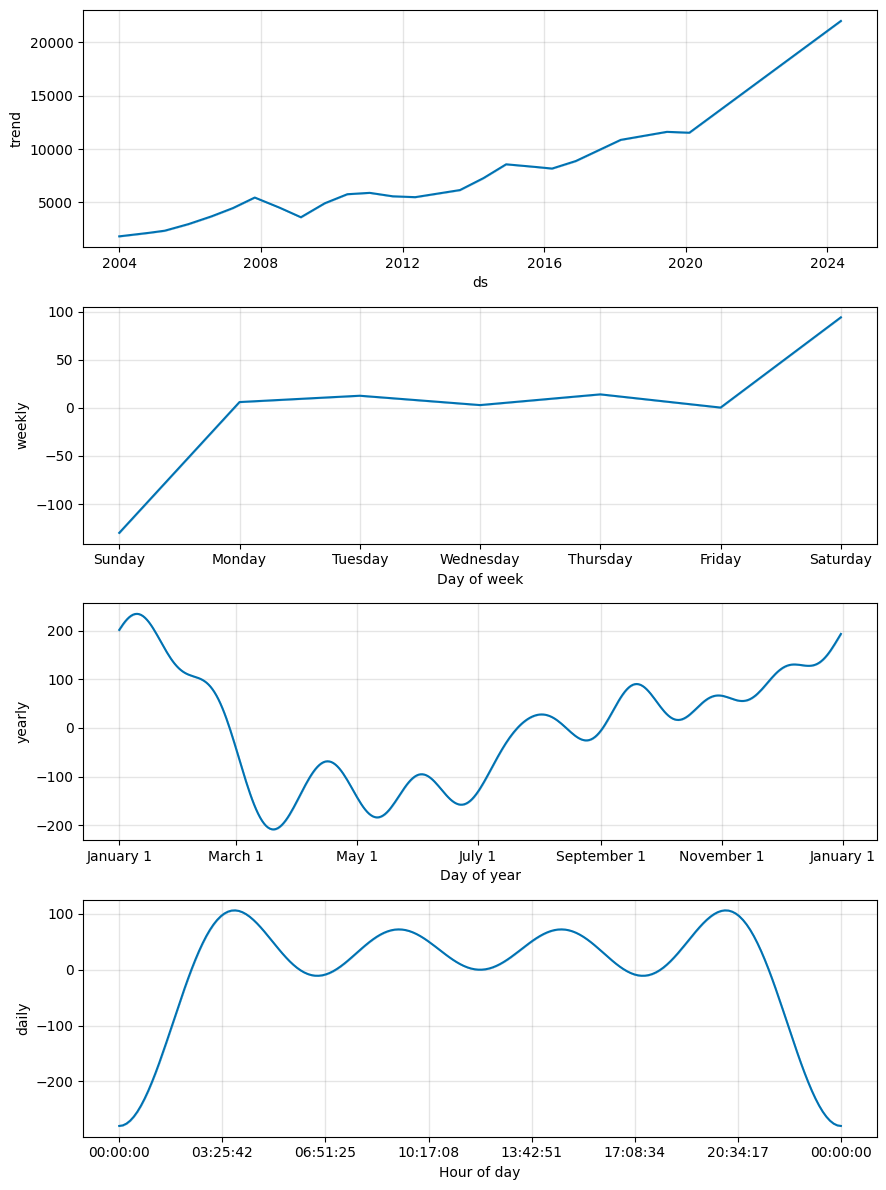

In [ ]:
fig2 = prophet.plot_components(prediction)